## Question 4: Logistic Regression and Gradient Descent 

In [40]:
# import the necessary packages
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import recall_score,precision_score
import numpy as np
import argparse

In [41]:
# sigmoid function
def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))

Loading Cancer dataset

In [42]:
cancer = load_breast_cancer()
X= StandardScaler().fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(X, cancer.target, stratify=cancer.target, random_state=42)

### a. Chossing alpha value
Setting best values for alpha 
* Alpha = 1

In [79]:
args={}
args['epochs'] = 100
args['alpha'] = 1

In [80]:
# Dataset
X_train = np.c_[np.ones((X_train.shape[0])), X_train]
X_test = np.c_[np.ones((X_test.shape[0])), X_test]

print("[INFO] starting training...")
W = np.random.uniform(size=(X_train.shape[1],))


lossHistory = []
for epoch in np.arange(0, args["epochs"]):
    preds = sigmoid_activation(X_train.dot(W))
    error = preds - y_train
    loss = np.sum(error ** 2)
    lossHistory.append(loss)
    gradient = X_train.T.dot(error) / X_train.shape[0]
    W += -args["alpha"] * gradient
    
print("[INFO] epoch #{}, loss={:.7f}".format(epoch + 1, loss))


y_pred = []
for i in range(X_test.shape[0]):
    activation = sigmoid_activation(X_test[i].dot(W))
    label = 0 if activation < 0.5 else 1
    y_pred.append(label)


[INFO] starting training...
[INFO] epoch #100, loss=5.7669447


### b . Report the accuracy, recall (true positive rate) and precision.

In [81]:
print ("Confusiton Matrix")
print (confusion_matrix(y_test, y_pred))
print ("Accuracy: {:.7f}".format(accuracy_score(y_test,y_pred)))
print ("Recall: {:.7f}".format(recall_score(y_test,y_pred)))
print ("Precision: {:.7f}".format(precision_score(y_test,y_pred)))

Confusiton Matrix
[[52  1]
 [ 2 88]]
Accuracy: 0.9790210
Recall: 0.9777778
Precision: 0.9887640


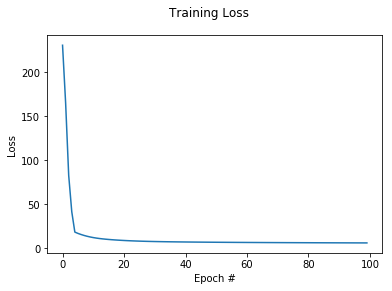

In [82]:
# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0, args["epochs"]), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()